### 0.1. Setup

In [1]:
%pip install numpy pandas matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 1. Load and Prepare the Dataset

In [3]:
dt = pd.read_csv("Heart_Disease_Prediction.csv")
dt.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## Mapping Heart Disease to (0,1)

In [4]:
df  = dt.replace({"Presence":1, "Absence":0})
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


## Exploratory Data Analysis (EDA)

Using pandas we can make a general summary of the statistics, knowing the number of people who have heart disease or not.

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), object(1)
m

This function show us a summary to check how many possible null values it might find in the dataset.

When we downloaded it from Kaggle, there were a total of 270, so we can see that there are no null values.

In [6]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


Pandas, through the **describe** function, allow us to create a summary that shows important characteristics such as the overall average of a column, the minimum, 25%, 50%, 75% and the maximum.

This can give us an indication or some clues about characteristics that may influence the outcome. An example of this could be **ST depression**; if it obtains considerably high values, it can signify **myocardial damage** and in some case may be the only early indication of an acute myocardial infarction.

In [7]:
df.groupby(['Sex']).Age.count()

Sex
0     87
1    183
Name: Age, dtype: int64

We can obtain the distribution of the number of Women (0) and Men (1)


Similarly, using matplot we can see a frequency histogram to look at the number of people with heart disease.

In [8]:
df.groupby(['Heart Disease']).Age.count()

Heart Disease
0    150
1    120
Name: Age, dtype: int64

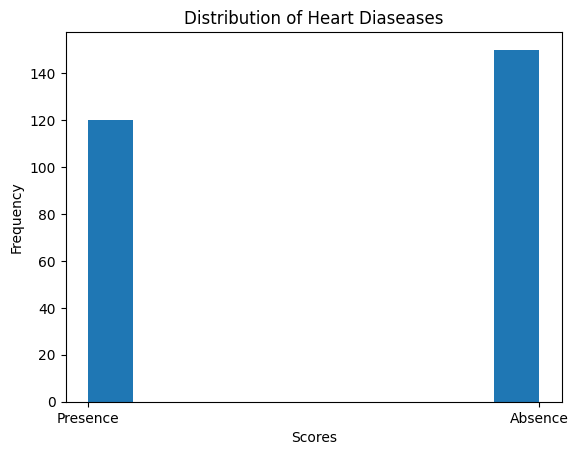

In [9]:
plt.hist(dt["Heart Disease"])
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.title("Distribution of Heart Diaseases")
plt.show()

### Handle Outliers

Given How the Dataset was defined in Kaggle, only outliers associated with 3 columns will be reviewed: "Cholesterol", "BP", and "Max Hr". 

The other columns mostly handle normal values or only 0 and 1.

<Axes: >

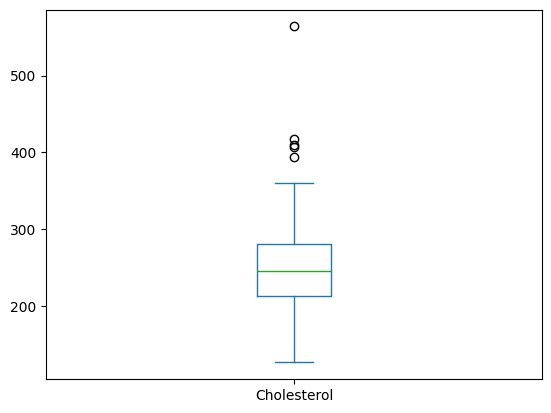

In [10]:
df["Cholesterol"].plot(kind='box')

Using a whisker box, outliers can be identified; these exceed the upper limite, and upon review, we realize there are only 5. 

They will not be deleted because they can influence and help the model determine when a patient has a higher chance of suffereing from heart disease.

<Axes: >

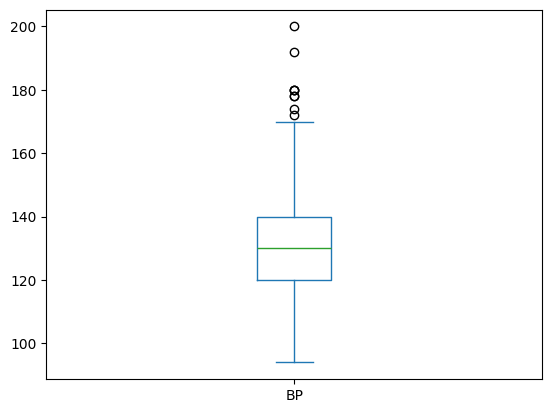

In [11]:
df["BP"].plot(kind='box')

In this case, we observed **blood presuare** values that exceed the upper limit, but which can be of great importance because it is possible that a seriously ill patient could reach this pressuare level.

<Axes: >

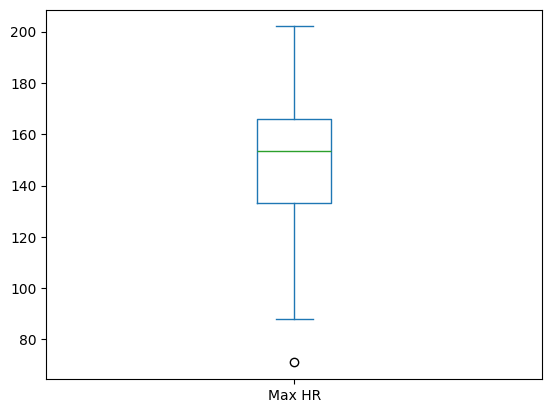

In [12]:
df["Max HR"].plot(kind='box')

This feature allows us to see the maximum frequency capacity that the heart has when it is under stress.

We can see a data point that is below the lower limit; this may indicate the serverity of the patient's condition.

### Preparation

The dataset was then split into two parts: 70% for the training phase and 30% for the evaluation phase. More than six features were selected and normalized to minimize the influence of each feature on the results.


In [13]:
#Dataset with >= 6 features

final_dataset = df[["Age", "Sex", "Cholesterol", "BP", "Max HR","ST depression", "Number of vessels fluro", "Heart Disease"]]

final_dataset = final_dataset.sample(frac=1, random_state=42)

final_dataset = final_dataset.reset_index(drop=True)

train_size = 0.7
test_size = 0.3

total_rows = len(final_dataset)
train_end = int(total_rows * train_size)

train_dataset = final_dataset.iloc[:train_end]
test_dataset = final_dataset.iloc[train_end:]

print(f"Total rows: {total_rows}")
print(f"Train set size: {len(train_dataset)} ({len(train_dataset)/total_rows:.2%})")
print(f"Test set size: {len(test_dataset)} ({len(test_dataset)/total_rows:.2%})")

X_train = train_dataset[["Age", "Sex", "Cholesterol", "BP", "Max HR","ST depression", "Number of vessels fluro"]]
Y_train = train_dataset[["Heart Disease"]]
X_test = test_dataset[["Age", "Sex", "Cholesterol", "BP", "Max HR","ST depression", "Number of vessels fluro"]]
Y_test = test_dataset[["Heart Disease"]]

x_preview_train = X_train
y_preview_train = Y_train

X_train = X_train.values
Y_train = Y_train.values.ravel()

X_test = X_test.values
Y_test = Y_test.values.ravel()

X_train = X_train.astype(np.float64)
Y_train = Y_train.astype(np.float64)

X_test = X_test.astype(np.float64)
Y_test = Y_test.astype(np.float64)

X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0) + 1e-8
X_train = (X_train - X_train_mean) / X_train_std

X_test = (X_test - X_train_mean) / X_train_std

print(X_train)
print(Y_train)

Total rows: 270
Train set size: 189 (70.00%)
Test set size: 81 (30.00%)
[[ 0.35726472  0.67368103 -0.3507905  ... -0.01215788 -0.4893257
   0.41006101]
 [-0.84654947  0.67368103  0.0664493  ... -0.2722907  -0.1208693
  -0.71314957]
 [ 0.24782707  0.67368103 -0.20475657 ...  1.20179524 -0.1208693
  -0.71314957]
 ...
 [ 1.56107891  0.67368103  0.58799905 ... -0.01215788  0.61604351
  -0.71314957]
 [-1.06542477  0.67368103 -1.01837417 ...  1.15843977 -0.8577821
   0.41006101]
 [-0.18992355  0.67368103 -0.70544432 ...  0.76824056  0.06335891
   1.53327158]]
[1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1

## Step 2: Implement Basic Logistic Regression

### 2.1 Sigmoid Function

Based on our **hypothesis** (model) for a logistic regression, which is:

$$
f_{\vec{w}, b}(\vec{x}) = \sigma(z)
$$
where
$$
z = \vec{w} \cdot \vec{x} + b
$$

The function $\sigma(z)$ is the **sigmoid**:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Interpretation:
$$
f_{\vec{w}, b}(\vec{x}) = P(y = 1 \mid \vec{x}; \vec{w}, b)
$$

So for sample $i$:
$$
f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) = \sigma(\vec{w} \cdot \vec{x}^{(i)} + b)
$$

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### 2.2 Cost Function (Binary Cross Entropy)

The cost function for logistic regression is defined as follows:

$$
J(\vec{w}, b) =
-\frac{1}{m}
\sum_{i=1}^m
\left[
y^{(i)} \log f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)})
+
(1 - y^{(i)}) \log\big(1 - f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)})\big)
\right].
$$

Where $$y^{(i)} = (0, 1)$$ in this case is to determine if a patient has Heart Disease 

In [15]:
def compute_cost(w, b, X, y):

    m, n = X.shape

    z = X @ w + b
    f = sigmoid(z)

    eps = 1e-8
    f_clipped = np.clip(f, eps, 1 - eps)

    J = -(1 / m) * np.sum(
        y * np.log(f_clipped) + (1 - y) * np.log(1 - f_clipped)
    )

    return J

### 2.3 Gradients of the Cost Function

We want to minimize the cost function; for this we use the gradient of the descent, which requires partial derivatives.

For each parameter $w_j$:
$$
\frac{\partial J}{\partial w_j}
=
\frac{1}{m}
\sum_{i=1}^m
\left(
f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) - y^{(i)}
\right)
x^{(i)}_j,
$$
and for the bias:
$$
\frac{\partial J}{\partial b}
=
\frac{1}{m}
\sum_{i=1}^m
\left(
f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) - y^{(i)}
\right).
$$

Vectorized view (conceptual):

1. Compute all $z^{(i)} = \vec{w} \cdot \vec{x}^{(i)} + b$ and
   $$
   f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) = \sigma(z^{(i)}).
   $$
2. Define the error vector $\vec{e}$ with components
   $$
   e^{(i)} = f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) - y^{(i)}.
   $$
3. Then
   $$
   \nabla_{\vec{w}} J = \frac{1}{m} X^\top \vec{e}, \quad
   \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m e^{(i)}.
   $$


In [16]:
def compute_gradient(w, b, X, y):
    
    m, n = X.shape

    z = X @ w + b

    f = sigmoid(z)

    error = f - y

    dj_dw = (1 / m) * (X.T @ error)
    dj_db = (1 / m) * np.sum(error)

    return dj_dw, dj_db


### 2.4 Gradient Descent

To minimize $J(\vec{w}, b)$, we update the parameters in the opposite direction
of the gradient.

For each weight $w_j$:
$$
w_j := w_j - \alpha \frac{\partial J}{\partial w_j},
$$
and for the bias:
$$
b := b - \alpha \frac{\partial J}{\partial b},
$$

where $\alpha > 0$ is the **learning rate**.

In [17]:
def gradient_descent(X, y, w_init, b_init, alpha, num_iters, print_every=0):
    w = w_init.copy()
    b = b_init
    J_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(w, b, X, y)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J = compute_cost(w, b, X, y)
        J_history.append(J)

        if print_every > 0 and (i % print_every == 0 or i == num_iters - 1):
            print(f"Iteration {i:4d}: J(w,b) = {J:.4f}")
    
    return w, b, J_history

### 2.5 Train on full train set

In [18]:
m_lin, n_lin = X_train.shape

w0 = np.zeros(n_lin)
b0 = 0.0
alpha = 0.01
num_iters = 2000

w_trained, b_trained, J_hist = gradient_descent(X_train, Y_train, w0, b0, alpha, num_iters, print_every=50)

w_trained, b_trained

Iteration    0: J(w,b) = 0.6914
Iteration   50: J(w,b) = 0.6216
Iteration  100: J(w,b) = 0.5752
Iteration  150: J(w,b) = 0.5430
Iteration  200: J(w,b) = 0.5197
Iteration  250: J(w,b) = 0.5021
Iteration  300: J(w,b) = 0.4885
Iteration  350: J(w,b) = 0.4777
Iteration  400: J(w,b) = 0.4689
Iteration  450: J(w,b) = 0.4616
Iteration  500: J(w,b) = 0.4555
Iteration  550: J(w,b) = 0.4504
Iteration  600: J(w,b) = 0.4460
Iteration  650: J(w,b) = 0.4421
Iteration  700: J(w,b) = 0.4388
Iteration  750: J(w,b) = 0.4359
Iteration  800: J(w,b) = 0.4333
Iteration  850: J(w,b) = 0.4310
Iteration  900: J(w,b) = 0.4289
Iteration  950: J(w,b) = 0.4271
Iteration 1000: J(w,b) = 0.4254
Iteration 1050: J(w,b) = 0.4239
Iteration 1100: J(w,b) = 0.4225
Iteration 1150: J(w,b) = 0.4213
Iteration 1200: J(w,b) = 0.4202
Iteration 1250: J(w,b) = 0.4191
Iteration 1300: J(w,b) = 0.4182
Iteration 1350: J(w,b) = 0.4173
Iteration 1400: J(w,b) = 0.4165
Iteration 1450: J(w,b) = 0.4158
Iteration 1500: J(w,b) = 0.4151
Iteratio

(array([-0.1718486 ,  0.84469566,  0.51353998,  0.25765252, -0.78128754,
         0.50264431,  0.92502932]),
 np.float64(-0.38732888562715495))

### 2.6 Plot Cost vs Iterations

### Train

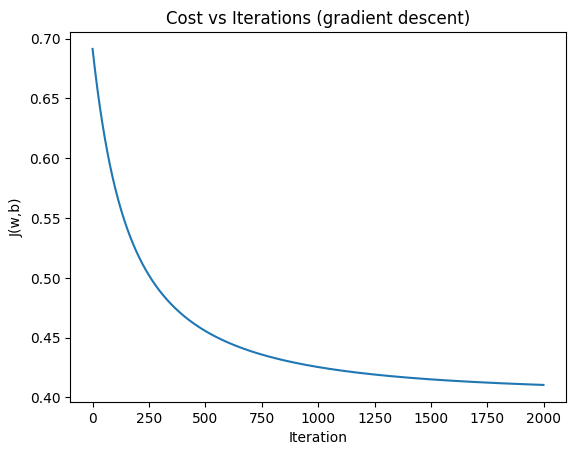

In [19]:
plt.figure()
plt.plot(J_hist)
plt.title("Cost vs Iterations (gradient descent)")
plt.xlabel("Iteration")
plt.ylabel("J(w,b)")
plt.show()

### 2.7 Metrics (acc/precision/recall/f1)

To calculate the metrics, we first need the prediction function that will use the zigmoid function taking into account the values we found in the previous training.

In [20]:
def calculate_z(X, w, b):
    return X @ w + b

def predict(X ,w, b, threshold=0.5):
    z = calculate_z(X, w, b)
    pred = sigmoid(z)
    return pred >= threshold

Similarly, we need to calculate all the defined values,

such as:

TP = true positive

TN = true negative

FP = false positive

FN = false negative

In [21]:
def calculateParameters(y_true, y_pred):

    TP = np.sum((y_true == 1.0) & (y_pred == 1.0))
    TN = np.sum((y_true == 0.0) & (y_pred == 0.0))
    FP = np.sum((y_true == 0.0) & (y_pred == 1.0))
    FN = np.sum((y_true == 1.0) & (y_pred == 0.0))

    return TP, TN, FP, FN



Y_pred_train = predict(X_train, w_trained, b_trained)
Y_pred_test = predict(X_test, w_trained, b_trained)

print(Y_test)


[1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 0.]


In [22]:
TP_test, TN_test, FP_test, FN_test = calculateParameters(Y_test, Y_pred_test)

TP_train, TN_train, FP_train, FN_train = calculateParameters(Y_train, Y_pred_train)

### - Accuracy

Accuracy is defined as:
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In [23]:
accuracy_train = (TP_train + TN_train) / (TP_train + TN_train + FP_train + FN_train)

accuracy_test = (TP_test + TN_test) / (TP_test + TN_test + FP_test + FN_test)

print(accuracy_train)

print(accuracy_test)

0.8148148148148148
0.8148148148148148


This metrics measeures how closely the results approximate the true value

### Precision

Precision is defined as:

$$Precision = \frac{TP}{TP + FP}$$

In [24]:
precision_train = (TP_train) / (TP_train + FP_train)

precision_test = (TP_test) / (TP_test + FP_test)

print(precision_test)

print(precision_train)

0.8571428571428571
0.8


This metric is responsible for measuring the accuracy of the predictions

### Recall 

Recall is defined as: 

$$Recall = \frac{TP}{TP + FN}$$

In [25]:
recall_train = (TP_train) / (TP_train + FN_train)

recall_test = (TP_test) / (TP_test + FN_test)

print(recall_train)

print(recall_test)

0.75
0.75


This metric can be used to determine the set of values that are truly positive

### F1-Score

F1 is defined as:

$$F1 SCORE = 2 * \frac{Precision * Recall}{Precision + Recall}

In [26]:
f1_score_train = 2 * ((precision_train * recall_train) / (precision_train + recall_train))

f1_score_test = 2 * ((precision_test * recall_test) / (precision_test + recall_test))

print(f1_score_train)

print(f1_score_test)

0.7741935483870969
0.7999999999999999


In [27]:
data_train = {'Accuracy':[accuracy_train],'Precision':[precision_train],'Recall':[recall_train],'F1 Score':[f1_score_train]}
df_train = pd.DataFrame(data_train)

print("Metrics Table")
print("------------------")
print("Train")
df_train.head()


Metrics Table
------------------
Train


,Accuracy,Precision,Recall,F1 Score
0,0.814815,0.8,0.75,0.774194


In [28]:
data_test = {'Accuracy':[accuracy_test],'Precision':[precision_test],'Recall':[recall_test],'F1 Score': [f1_score_test]}
df_test = pd.DataFrame(data_test)
print("Test ")
df_test.head()

Test 


,Accuracy,Precision,Recall,F1 Score
0,0.814815,0.857143,0.75,0.8


## Step 3 Visualize Decision Boundaries 

Select ≥3 feature pairs (e.g., Age-Cholesterol, BP-Max HR, ST Depression-Vessels).

For each: Subset to 2D, train model, plot boundary line + scatter (true labels).

### Age-Cholesterol

In [29]:
x_age_cholesterol = x_preview_train[["Age", "Cholesterol"]]
y_age_cholesterol = y_preview_train[["Heart Disease"]]

y_age_cholesterol.head()

x_age_cholesterol = x_age_cholesterol.values
y_age_cholesterol = y_age_cholesterol.to_numpy().ravel()

x_age_cholesterol = x_age_cholesterol.astype(np.float64)
y_age_cholesterol = y_age_cholesterol.astype(np.float64)

x_age_cholesterol_mean = x_age_cholesterol.mean(axis=0)
x_age_cholesterol_std = x_age_cholesterol.std(axis=0) + 1e-8
x_age_cholesterol = (x_age_cholesterol - x_age_cholesterol_mean) / x_age_cholesterol_std


m_age_lin, n_age_lin = x_age_cholesterol.shape
w_age_cholesterol = np.zeros(n_age_lin)
b_age_cholesterol = 0.0

num_iters = 2000
alpha_age_cholesterol = 0.01

w_age_trained, b_age_trained, J_hist_age = gradient_descent(x_age_cholesterol, y_age_cholesterol, w_age_cholesterol, b_age_cholesterol, alpha_age_cholesterol, num_iters, print_every=50)

w_age_trained, b_age_trained


Iteration    0: J(w,b) = 0.6929
Iteration   50: J(w,b) = 0.6829
Iteration  100: J(w,b) = 0.6754
Iteration  150: J(w,b) = 0.6697
Iteration  200: J(w,b) = 0.6654
Iteration  250: J(w,b) = 0.6621
Iteration  300: J(w,b) = 0.6596
Iteration  350: J(w,b) = 0.6577
Iteration  400: J(w,b) = 0.6562
Iteration  450: J(w,b) = 0.6551
Iteration  500: J(w,b) = 0.6542
Iteration  550: J(w,b) = 0.6535
Iteration  600: J(w,b) = 0.6530
Iteration  650: J(w,b) = 0.6526
Iteration  700: J(w,b) = 0.6522
Iteration  750: J(w,b) = 0.6520
Iteration  800: J(w,b) = 0.6518
Iteration  850: J(w,b) = 0.6516
Iteration  900: J(w,b) = 0.6515
Iteration  950: J(w,b) = 0.6514
Iteration 1000: J(w,b) = 0.6513
Iteration 1050: J(w,b) = 0.6513
Iteration 1100: J(w,b) = 0.6512
Iteration 1150: J(w,b) = 0.6512
Iteration 1200: J(w,b) = 0.6511
Iteration 1250: J(w,b) = 0.6511
Iteration 1300: J(w,b) = 0.6511
Iteration 1350: J(w,b) = 0.6511
Iteration 1400: J(w,b) = 0.6511
Iteration 1450: J(w,b) = 0.6510
Iteration 1500: J(w,b) = 0.6510
Iteratio

(array([0.28040251, 0.37878797]), np.float64(-0.32302731410063))

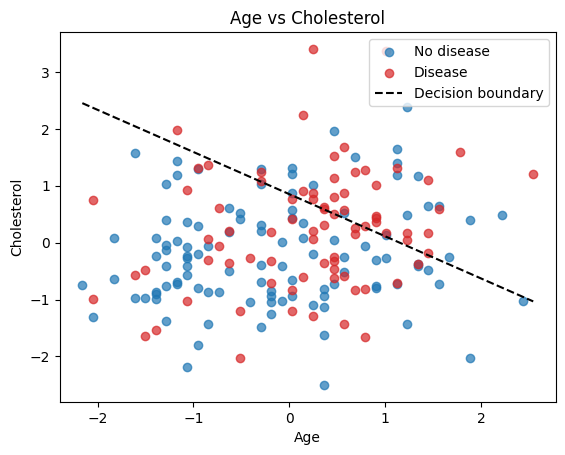

In [30]:
def plot_boundary_and_scatter(X, y, w, b, title, feature_names):
    plt.figure()
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c="tab:blue", label="No disease", alpha=0.7)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c="tab:red", label="Disease", alpha=0.7)

    x1_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)
    if abs(w[1]) < 1e-8:
        x1_line = -b / (w[0] + 1e-8)
        plt.axvline(x=x1_line, color="k", linestyle="--", label="Decision boundary")
    else:
        x2_vals = -(w[0] * x1_vals + b) / w[1]
        plt.plot(x1_vals, x2_vals, "k--", label="Decision boundary")

    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.legend()
    plt.show()


plot_boundary_and_scatter(x_age_cholesterol, y_age_cholesterol, w_age_trained, b_age_trained,
                          "Age vs Cholesterol", ["Age", "Cholesterol"])

### BP-Max HR

In [31]:
x_bp_maxHr = x_preview_train[["BP", "Max HR"]]
y_bp_maxHr = y_preview_train[["Heart Disease"]]

y_bp_maxHr.head()

x_bp_maxHr = x_bp_maxHr.values
y_bp_maxHr = y_bp_maxHr.to_numpy().ravel()

x_bp_maxHr = x_bp_maxHr.astype(np.float64)
y_bp_maxHr = y_bp_maxHr.astype(np.float64)

x_bp_maxHr_mean = x_bp_maxHr.mean(axis=0)
x_bp_maxHr_std = x_bp_maxHr.std(axis=0) + 1e-8
x_bp_maxHr = (x_bp_maxHr - x_bp_maxHr_mean) / x_bp_maxHr_std


m_age_lin, n_age_lin = x_bp_maxHr.shape
w_bp_maxHr = np.zeros(n_age_lin)
b_bp_maxHr = 0.0

num_iters = 2000
alpha_age_cholesterol = 0.01

w_bp_maxHr, b_bp_maxHr, J_hist_bp = gradient_descent(x_bp_maxHr, y_bp_maxHr, w_bp_maxHr, b_bp_maxHr, alpha_age_cholesterol, num_iters, print_every=50)

w_bp_maxHr, b_bp_maxHr


Iteration    0: J(w,b) = 0.6927
Iteration   50: J(w,b) = 0.6713
Iteration  100: J(w,b) = 0.6546
Iteration  150: J(w,b) = 0.6415
Iteration  200: J(w,b) = 0.6313
Iteration  250: J(w,b) = 0.6231
Iteration  300: J(w,b) = 0.6167
Iteration  350: J(w,b) = 0.6115
Iteration  400: J(w,b) = 0.6073
Iteration  450: J(w,b) = 0.6039
Iteration  500: J(w,b) = 0.6012
Iteration  550: J(w,b) = 0.5989
Iteration  600: J(w,b) = 0.5971
Iteration  650: J(w,b) = 0.5955
Iteration  700: J(w,b) = 0.5943
Iteration  750: J(w,b) = 0.5932
Iteration  800: J(w,b) = 0.5924
Iteration  850: J(w,b) = 0.5916
Iteration  900: J(w,b) = 0.5910
Iteration  950: J(w,b) = 0.5905
Iteration 1000: J(w,b) = 0.5901
Iteration 1050: J(w,b) = 0.5897
Iteration 1100: J(w,b) = 0.5894
Iteration 1150: J(w,b) = 0.5892
Iteration 1200: J(w,b) = 0.5889
Iteration 1250: J(w,b) = 0.5888
Iteration 1300: J(w,b) = 0.5886
Iteration 1350: J(w,b) = 0.5885
Iteration 1400: J(w,b) = 0.5884
Iteration 1450: J(w,b) = 0.5883
Iteration 1500: J(w,b) = 0.5882
Iteratio

(array([ 0.32159981, -0.89500056]), np.float64(-0.3405592681000263))

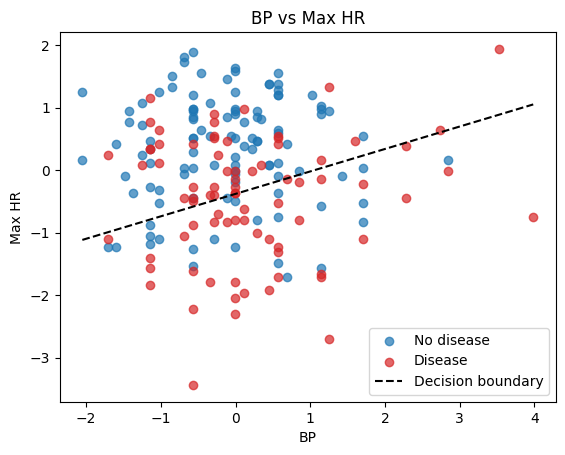

In [32]:
plot_boundary_and_scatter(x_bp_maxHr, y_bp_maxHr, w_bp_maxHr, b_bp_maxHr,
                          "BP vs Max HR", ["BP", "Max HR"])

### ST-Depression - Vassels

In [33]:
x_st_vessels = x_preview_train[["ST depression", "Number of vessels fluro"]]
y_st_vessels = y_preview_train[["Heart Disease"]]

y_st_vessels.head()

x_st_vessels = x_st_vessels.values
y_st_vessels = y_st_vessels.to_numpy().ravel()

x_st_vessels = x_st_vessels.astype(np.float64)
y_st_vessels = y_st_vessels.astype(np.float64)

x_st_vessels_mean = x_st_vessels.mean(axis=0)
x_st_vessels_std = x_st_vessels.std(axis=0) + 1e-8
x_st_vessels = (x_st_vessels - x_st_vessels_mean) / x_st_vessels_std


m_age_lin, n_age_lin = x_st_vessels.shape
w_age_cholesterol = np.zeros(n_age_lin)
b_age_cholesterol = 0.0

num_iters = 2000
alpha_age_cholesterol = 0.01

w_st_vessels, b_st_vessels, J_hist_bp = gradient_descent(x_st_vessels, y_st_vessels, w_age_cholesterol, b_age_cholesterol, alpha_age_cholesterol, num_iters, print_every=50)

w_st_vessels, b_st_vessels


Iteration    0: J(w,b) = 0.6922
Iteration   50: J(w,b) = 0.6531
Iteration  100: J(w,b) = 0.6242
Iteration  150: J(w,b) = 0.6026
Iteration  200: J(w,b) = 0.5862
Iteration  250: J(w,b) = 0.5736
Iteration  300: J(w,b) = 0.5638
Iteration  350: J(w,b) = 0.5560
Iteration  400: J(w,b) = 0.5498
Iteration  450: J(w,b) = 0.5448
Iteration  500: J(w,b) = 0.5408
Iteration  550: J(w,b) = 0.5374
Iteration  600: J(w,b) = 0.5347
Iteration  650: J(w,b) = 0.5324
Iteration  700: J(w,b) = 0.5306
Iteration  750: J(w,b) = 0.5290
Iteration  800: J(w,b) = 0.5276
Iteration  850: J(w,b) = 0.5265
Iteration  900: J(w,b) = 0.5255
Iteration  950: J(w,b) = 0.5247
Iteration 1000: J(w,b) = 0.5240
Iteration 1050: J(w,b) = 0.5234
Iteration 1100: J(w,b) = 0.5229
Iteration 1150: J(w,b) = 0.5225
Iteration 1200: J(w,b) = 0.5221
Iteration 1250: J(w,b) = 0.5218
Iteration 1300: J(w,b) = 0.5215
Iteration 1350: J(w,b) = 0.5212
Iteration 1400: J(w,b) = 0.5210
Iteration 1450: J(w,b) = 0.5208
Iteration 1500: J(w,b) = 0.5206
Iteratio

(array([0.74423135, 1.0140618 ]), np.float64(-0.28238638591593523))

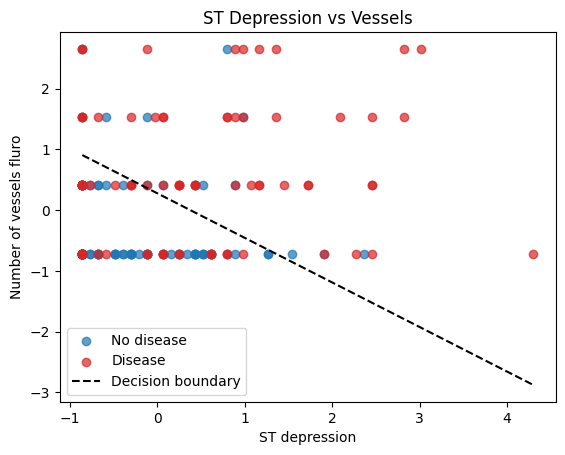

In [34]:
plot_boundary_and_scatter(x_st_vessels, y_st_vessels, w_st_vessels, b_st_vessels,
                          "ST Depression vs Vessels", ["ST depression", "Number of vessels fluro"])

### Separability / Non Linearity 

Taking into account the set of values associated with each characteristic when finding the decision limit, it is possible to determine how separable the class is; after the above we can conclude:


- **Age-Cholesterol**: In this plot, a possible separation between classes is not clearly visible since most of the data is mixed together.

- **BP-Max HR**: It is the one that can best divide between classes, althought it is clear that there are some visible errors.

- **ST depression-Vessels**: In this case, it is not possible; it can even be confusing or complicated to find a decision limit. This is due to the way the data is structured: ST values are small and few are large, while vessels is a large value.

## Step 4 Repeat with Regularization

When we add the regularization term, it is because we want to penalize **large parameters**.

**Regularization Term** is defined as:

$$
R(\vec{w}) = \sum_{j=1}^n w_j^2.
$$

We **do not** include the bias $b$ in this penalty (only the weights).

Regularization adds this penalty to the original cost function, controlled by a
hyperparameter $\lambda \ge 0$:

- $\lambda = 0$: no regularization (risk of overfitting).
- Large $\lambda$: strong penalty (risk of underfitting).
- Intermediate $\lambda$: good compromise.

### Cost Function with regularization

We have previously defined the cost function as:

$$
J(\vec{w}, b) =
-\frac{1}{m}
\sum_{i=1}^m
\left[
y^{(i)} \log f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)})
+
(1 - y^{(i)}) \log\big(1 - f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)})\big)
\right].
$$

with

$$
f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) = \sigma(\vec{w} \cdot \vec{x}^{(i)} + b).
$$

Adding **L2 regularization term**:

$$
J_{\text{reg}}(\vec{w}, b) =
-\frac{1}{m}
\sum_{i=1}^m
\left[
y^{(i)} \log f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) \;+\;
(1 - y^{(i)}) \log\big(1 - f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)})\big)
\right]
+
\frac{\lambda}{2m}\sum_{j=1}^n w_j^2.
$$

In [35]:
def compute_cost_log_reg_reg(w, b, X, y, lam):
    m, n = X.shape
    z = X @ w + b
    f = sigmoid(z)
    eps = 1e-8
    f_clipped = np.clip(f, eps, 1 - eps)

    ce = - (1 / m) * np.sum(
        y * np.log(f_clipped) + (1 - y) * np.log(1 - f_clipped)
    )

    reg = (lam / (2*m)) * np.sum(w ** 2)

    return ce + reg

### Gradient

The gradient can be calculated from partial derivatives:

$$
f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) = \sigma(\vec{w}\cdot\vec{x}^{(i)} + b).
$$

Define the error:
$$
e^{(i)} = f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) - y^{(i)}.
$$

Then the gradients of the regularized cost are:

For each weight $w_j$:
$$
\frac{\partial J_{\text{reg}}}{\partial w_j}
=
\frac{1}{m}\sum_{i=1}^m e^{(i)} x^{(i)}_j
+
\frac{\lambda}{m} w_j,
$$

and for the bias:
$$
\frac{\partial J_{\text{reg}}}{\partial b}
=
\frac{1}{m}\sum_{i=1}^m e^{(i)}.
$$

In [36]:
def compute_gradient_log_reg_reg(w, b, X, y, lam):
    m, n = X.shape
    z = X @ w + b 
    f = sigmoid(z)
    error = f - y
    dj_dw = (1 / m) * (X.T @ error) + (lam / m) * w
    dj_db = (1 / m) * np.sum(error)

    return dj_dw, dj_db

### Descent Gradient

Finally, calculate the gradient descent where we will be consecutively updating **w** and **b**

$$
w_j := w_j - \alpha \frac{\partial J_{\text{reg}}}{\partial w_j},
\quad
b := b - \alpha \frac{\partial J_{\text{reg}}}{\partial b}.
$$

In [37]:
def gradient_descent_log_reg_reg(X, y, w_init, b_init, alpha, lam, num_iters):
    w = w_init.copy()
    b = b_init
    J_history = []
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_log_reg_reg(w, b, X, y, lam)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        J_history.append(compute_cost_log_reg_reg(w, b, X, y, lam))

    return w, b, J_history

### 4.1 Tune λ

Based on a set of values assigned to lambda, we will retrain the model, re-evaluate metrics, and re-graph respectively

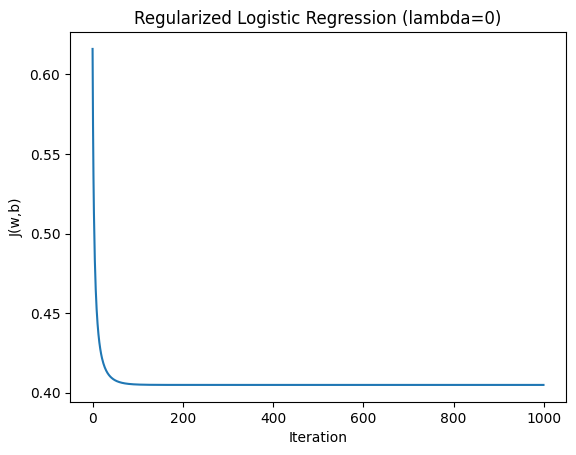

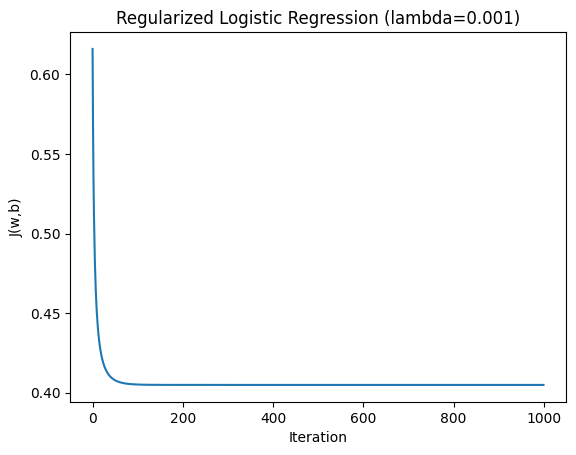

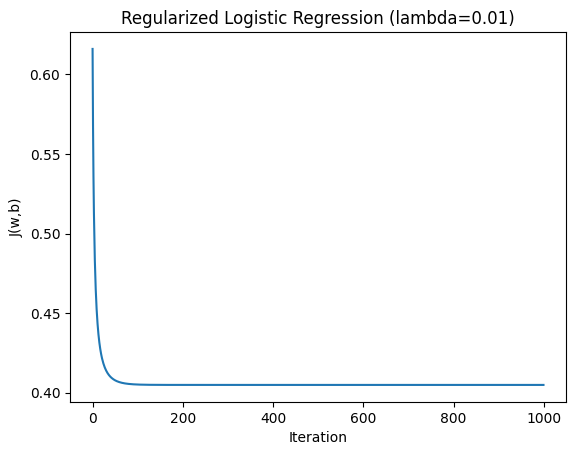

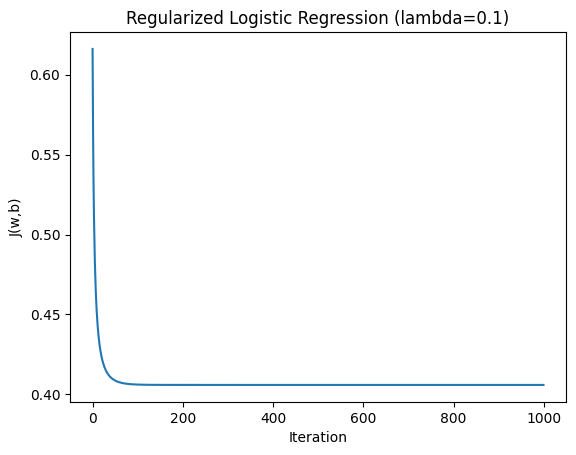

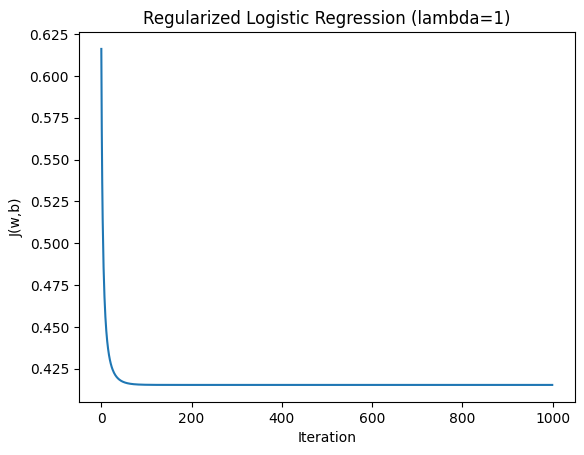

In [ ]:
def plot_decision_boundary_logreg(w, b, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    z = grid @ w + b
    probs = sigmoid(z).reshape(xx.shape)
    
    plt.figure()
    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.2, colors=["tab:blue", "tab:orange"])
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="y = 0")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="y = 1")
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.show() 


def reTrainFullModel(X, Y, dimensions, alpha, lamda, num_iters):
    w_reTrain = []
    b_reTrain = []
    for lam in lamda:
        w0 = np.zeros(dimensions)
        b0 = 0.0
        w_reg, b_reg, J_hist = gradient_descent_log_reg_reg(
            X, Y, w0, b0, alpha, lam, num_iters
        )

        plt.figure()
        plt.plot(J_hist)
        title = f"Regularized Logistic Regression (lambda={lam})"
        plt.title(title)
        plt.xlabel("Iteration")
        plt.ylabel("J(w,b)")
        plt.show()

        w_reTrain.append(w_reg)
        b_reTrain.append(b_reg)
    
    return w_reTrain, b_reTrain


lambdas = [0, 0.001, 0.01, 0.1, 1]
w_reTrain_log, b_reTrain_log = reTrainFullModel(X_train, Y_train, 7, 0.5, lambdas, 1000)
    



### Age - Cholesterol

No Regularization Term

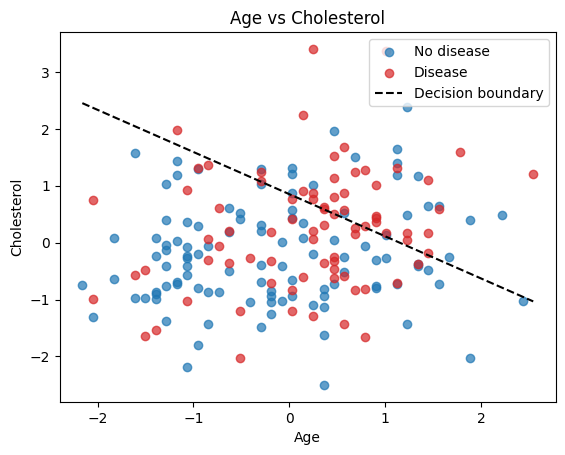

In [39]:
plot_boundary_and_scatter(x_age_cholesterol, y_age_cholesterol, w_age_trained, b_age_trained,
                          "Age vs Cholesterol", ["Age", "Cholesterol"])

(189, 2)


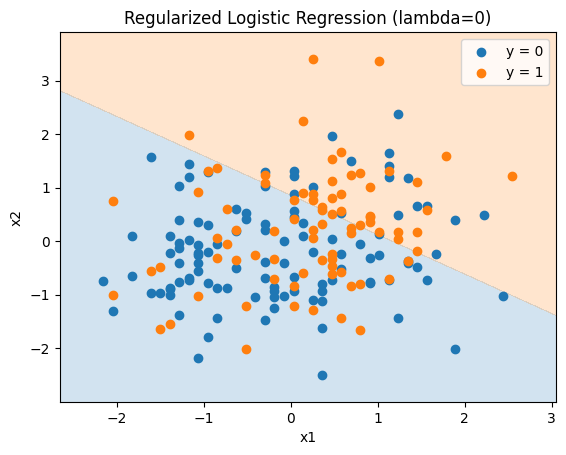

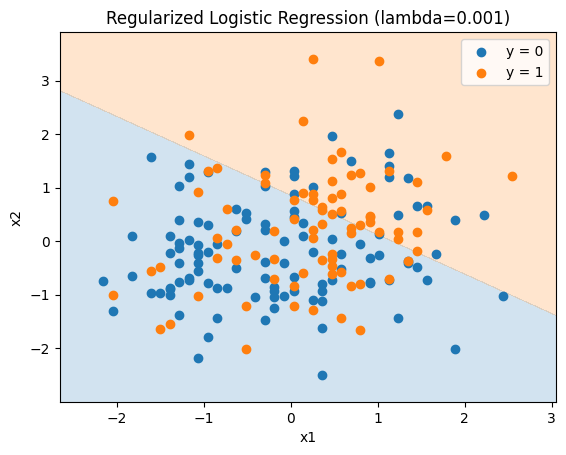

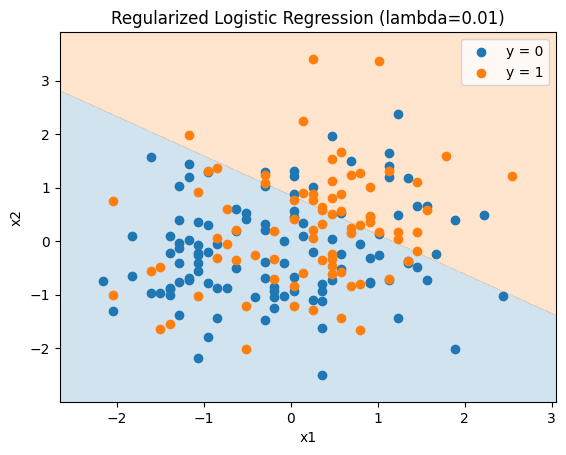

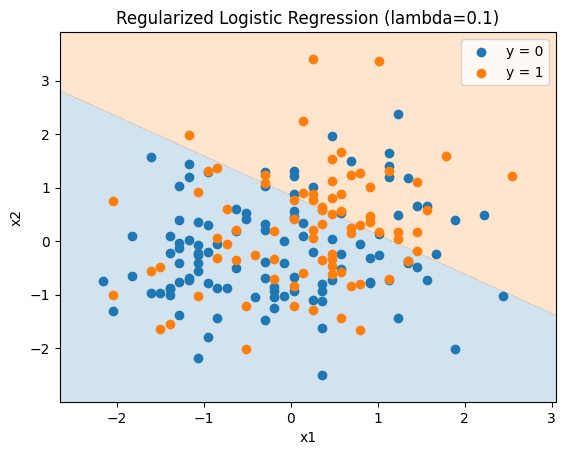

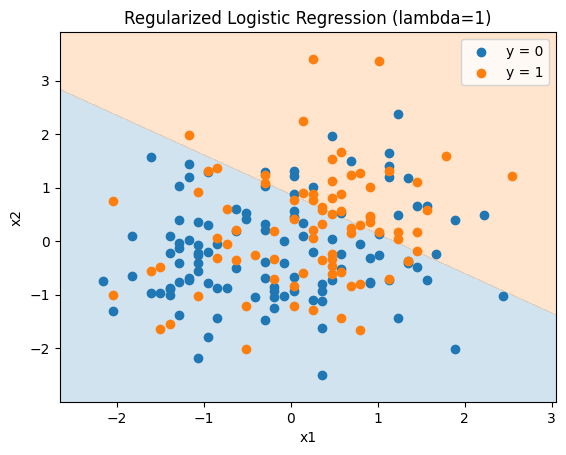

In [40]:
def reTrainPairModel(X, Y, dimensions, alpha, lamda, num_iters):
    for lam in lamda:
        w0 = np.zeros(dimensions)
        b0 = 0.0
        w_reg, b_reg, J_hist = gradient_descent_log_reg_reg(
            X, Y, w0, b0, alpha, lam, num_iters
        )
        plot_decision_boundary_logreg(
        w_reg, b_reg, X, Y, title=f"Regularized Logistic Regression (lambda={lam})"
        )
print(x_age_cholesterol.shape)
reTrainPairModel(x_age_cholesterol,y_age_cholesterol,x_age_cholesterol.shape[1],0.5,lambdas, 1000) 

### Re-Eval Metrics

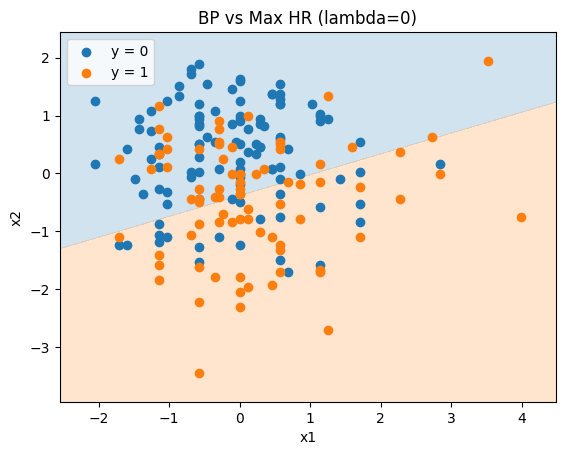

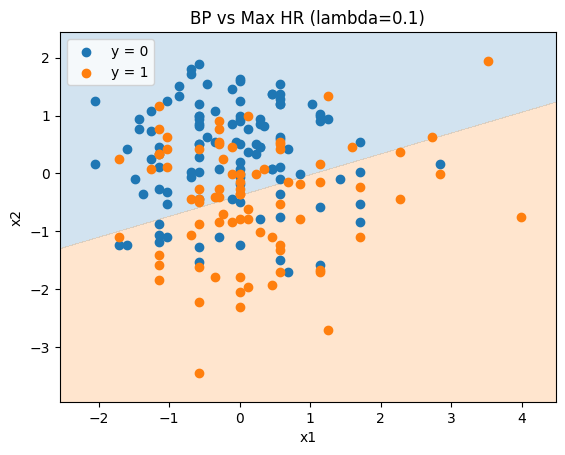

In [47]:
def evaluate_metrics_and_norm(X_train, y_train, X_test, y_test, w, b):
    y_pred_train = predict(X_train, w, b)
    y_pred_test = predict(X_test, w, b)

    TP_tr, TN_tr, FP_tr, FN_tr = calculateParameters(y_train, y_pred_train)
    TP_te, TN_te, FP_te, FN_te = calculateParameters(y_test, y_pred_test)

    acc_tr = (TP_tr + TN_tr) / (TP_tr + TN_tr + FP_tr + FN_tr)
    acc_te = (TP_te + TN_te) / (TP_te + TN_te + FP_te + FN_te)

    prec_tr = TP_tr / (TP_tr + FP_tr + 1e-8)
    prec_te = TP_te / (TP_te + FP_te + 1e-8)

    rec_tr = TP_tr / (TP_tr + FN_tr + 1e-8)
    rec_te = TP_te / (TP_te + FN_te + 1e-8)

    f1_tr = 2 * (prec_tr * rec_tr) / (prec_tr + rec_tr + 1e-8)
    f1_te = 2 * (prec_te * rec_te) / (prec_te + rec_te + 1e-8)

    return {
        "train": {"acc": acc_tr, "prec": prec_tr, "rec": rec_tr, "f1": f1_tr},
        "test": {"acc": acc_te, "prec": prec_te, "rec": rec_te, "f1": f1_te},
        "w_norm": float(np.linalg.norm(w))
    }

X_pair = x_bp_maxHr
y_pair = y_bp_maxHr

w0 = np.zeros(X_pair.shape[1])
b0 = 0.0
w_unreg, b_unreg, J_unreg = gradient_descent(X_pair, y_pair, w0, b0, alpha=0.01, num_iters=2000, print_every=0)

plot_decision_boundary_logreg(w_unreg, b_unreg, X_pair, y_pair, title="BP vs Max HR (lambda=0)")
metrics_unreg = evaluate_metrics_and_norm(X_pair, y_pair, X_pair, y_pair, w_unreg, b_unreg)

lam = 0.1
w_reg, b_reg, J_reg = gradient_descent_log_reg_reg(X_pair, y_pair, w0, b0, alpha=0.01, lam=lam, num_iters=2000)

plot_decision_boundary_logreg(w_reg, b_reg, X_pair, y_pair, title=f"BP vs Max HR (lambda={lam})")
metrics_reg = evaluate_metrics_and_norm(X_pair, y_pair, X_pair, y_pair, w_reg, b_reg)


### Metrics Table

In [48]:
data_pair = {
    "Model": ["Unregularized (λ=0)", f"Regularized (λ={lam})"],
    "Accuracy": [metrics_unreg["train"]["acc"], metrics_reg["train"]["acc"]],
    "Precision": [metrics_unreg["train"]["prec"], metrics_reg["train"]["prec"]],
    "Recall": [metrics_unreg["train"]["rec"], metrics_reg["train"]["rec"]],
    "F1 Score": [metrics_unreg["train"]["f1"], metrics_reg["train"]["f1"]],
    "||w||": [metrics_unreg["w_norm"], metrics_reg["w_norm"]],
}

df_pair_metrics = pd.DataFrame(data_pair)
print("Metrics Table (Pair)")
print("---------------------")
df_pair_metrics

Metrics Table (Pair)
---------------------


,Model,Accuracy,Precision,Recall,F1 Score,||w||
0,Unregularized (λ=0),0.661376,0.625,0.5,0.555556,0.951027
1,Regularized (λ=0.1),0.661376,0.625,0.5,0.555556,0.948296


## Step 5 Explore Deployment in Amazon SageMaker